In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [79]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/Feature_engineering_train.csv")
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,...,srch_query_affinity_score,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate
0,0,0,0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.00
1,1,1,1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.00
2,2,2,2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.00
3,3,3,3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.00
4,4,4,4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,...,-326.5675,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.75


In [80]:
train= train.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"],axis=1)
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_query_affinity_score,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate
0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,7011,2,2.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.000000
1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,8797,2,2.5,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.000000
2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,14530,3,5.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000
3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,15770,2,2.5,...,-326.5675,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000
4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,20295,3,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.750000
5,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,22013,3,3.5,...,-326.5675,1,0,NaN,0,6.0,1.1,1.657459,4.972376,0.000000
6,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,25236,4,3.0,...,-326.5675,1,0,NaN,0,6.0,1.1,4.145078,7.772021,0.000000
7,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,27142,4,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,2.325581,6.201550,0.000000
8,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31166,2,3.0,...,-326.5675,1,0,NaN,0,6.0,1.1,0.847458,0.847458,0.000000
9,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31486,4,4.0,...,-326.5675,1,0,NaN,0,6.0,1.1,1.507538,6.030151,0.250000


### Modify the dataset for RandomForest regression and other standard ML algorithm

In [81]:
#Adding Score columns: 5 for booked, 1 clicked and 0 the rest
def assign_score(x):
    if x["booking_bool"]==1:
        val=5
    elif x["click_bool"]==1:
        val=1
    else:
        val=0
    return val
    

train['score'] = train.apply(assign_score , axis=1)


In [82]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score
0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,7011,2,2.0,...,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.000000,0
1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,8797,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.000000,0
2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,14530,3,5.0,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,15770,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,20295,3,4.0,...,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.750000,0
5,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,22013,3,3.5,...,1,0,NaN,0,6.0,1.1,1.657459,4.972376,0.000000,0
6,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,25236,4,3.0,...,1,0,NaN,0,6.0,1.1,4.145078,7.772021,0.000000,0
7,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,27142,4,4.0,...,1,0,NaN,0,6.0,1.1,2.325581,6.201550,0.000000,0
8,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31166,2,3.0,...,1,0,NaN,0,6.0,1.1,0.847458,0.847458,0.000000,0
9,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31486,4,4.0,...,1,0,NaN,0,6.0,1.1,1.507538,6.030151,0.250000,0


In [83]:
#add month columns and drop some useless columns
train["date_time"] = pd.to_datetime(train["date_time"])
train["month"] = train["date_time"].dt.month
column_id=train["srch_id"]
train = train.drop(["srch_id", "date_time"], axis=1)

In [85]:
#columns with Nan
train.columns[train.isna().any()].tolist()

['visitor_hist_starrating', 'visitor_hist_adr_usd', 'gross_bookings_usd']

In [86]:
#fill Nan
train=train.drop("gross_bookings_usd",axis=1)
values = {'visitor_hist_starrating': 0, 'visitor_hist_adr_usd': 0}
train=train.fillna(value=values)

In [87]:
np.all(np.isfinite(train))

False

In [88]:
#there are some infinite values in usd_diff
train= train.replace([np.inf, -np.inf], np.nan)
train.columns[train.isna().any()].tolist()
train=train.fillna(value={"usd_diff":0})

In [140]:
train.head()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,random_bool,click_bool,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score,month
0,5,219,0.0,0.0,219,7011,2,2.0,1,2.94,...,1,0,0,6.0,1.1,0.000000,1.075269,0.00,0,1
1,5,219,0.0,0.0,219,8797,2,2.5,1,2.71,...,1,0,0,6.0,1.1,0.000000,0.680272,1.00,0,1
2,5,219,0.0,0.0,219,14530,3,5.0,1,1.61,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
3,5,219,0.0,0.0,219,15770,2,2.5,1,2.89,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
4,5,219,0.0,0.0,219,20295,3,4.0,1,3.47,...,1,0,0,6.0,1.1,3.488372,5.813953,0.75,0,1


In [90]:
np.all(np.isfinite(train))

True

### separate labels

In [25]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set.csv")
train.head()


,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_saturday_night_bool,srch_query_affinity_score,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score
0,0,17,18,129,3.5,157.19,31,2196,4,4.5,...,1,-326.5675,NaN,0.5,0.243081,5.660377,5.660377,0.666667,11,0
1,1,17,18,129,3.5,157.19,31,3309,3,3.5,...,1,-326.5675,NaN,0.5,0.017477,0.000000,6.666667,0.000000,11,0
2,2,17,18,129,3.5,157.19,31,11331,4,4.0,...,1,-326.5675,NaN,0.5,0.289041,5.263158,5.263158,0.000000,11,0
3,3,17,18,129,3.5,157.19,31,17795,4,4.0,...,1,-326.5675,NaN,0.5,0.236977,4.000000,6.000000,1.000000,11,0
4,4,17,18,129,3.5,157.19,31,21770,3,4.5,...,1,-326.5675,NaN,0.5,0.031230,0.000000,7.142857,1.000000,11,0


In [7]:
train.columns

Index(['Unnamed: 0', 'srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'gross_bookings_usd', 'starrating_diff', 'usd_diff',
       'booked_percentage', 'clicked_percentage', 'avg_comp_rate', 'month',
       'score'],
      dtype='object')

In [27]:
column_id=train["srch_id"]
train=train.drop(["srch_id","Unnamed: 0", "gross_bookings_usd"], axis=1)

In [28]:
y=train["score"]
X=train.drop("score", axis=1)

In [13]:
#X=X.drop("gross_bookings_usd", axis=1)

In [29]:
X.columns[X.isna().any()].tolist()

[]

In [30]:
np.all(np.isfinite(X))

True

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13 )

In [26]:
regr = RandomForestRegressor(random_state=0, n_estimators=30, n_jobs=-1)
rfr = regr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(r2_score(prediction, y_test))


-3.033455626943735


In [1]:
y_test

NameError: name 'y_test' is not defined

In [43]:
prediction_s = pd.Series(prediction)


### ElasticNet

In [21]:
regr = ElasticNet(random_state=0, alpha=5.1506780761681216e-05,l1_ratio=0.4)
y_pred_enet = regr.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("r^2 on test data : %f" % r2_score_enet)

r^2 on test data : 0.103924


In [19]:
alphas = np.logspace(-5, 1, 60)
enet = ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 5.1506780761681216e-05


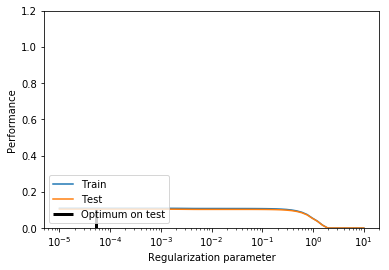

In [22]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

In [ ]:
#import real test set


### lambdaMART

In [23]:
from sklearn.datasets import dump_svmlight_file
from lambdamart import LambdaMART

In [31]:
#RUND THIS LINE only to save a new file in svm_light format
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining"+"/train_forLM_again.txt")


In [94]:
#tran_LM=pd.read_table("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM.txt")

In [33]:
#function to read the svm_light file and split it in TRAIN and TEST
def get_data(file_loc):
    f_train= open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt","w+")
    f_test= open("C://Users//david\Desktop//VU amsterdam//Data mining//test_lm.txt","w+")
    f = open(file_loc, 'r')
    test_flag=False
    i=1
    previous_id=0
    for line in f:
        arr = line.split()
        ''' Get the score and query id '''
        score = arr[0]
        q_id = arr[1].split(':')[1]
        #print(q_id)
        if previous_id==0:
            f_train.write(line)
        elif previous_id == q_id:
            if test_flag:
                f_test.write(line)
            else:
                f_train.write(line)
        else:
            if i%3 == 0:
                test_flag=True
                f_test.write(line)
            else:
                test_flag=False
                f_train.write(line)
            i+=1
        previous_id=q_id

    f.close()
    f_train.close()
    f_test.close()
# def get_data(file_loc):
# 	f = open(file_loc, 'r')
# 	data = []
# 	for line in f:
# 		new_arr = []
# 		arr = line.split(' #')[0].split()
# 		''' Get the score and query id '''
# 		score = arr[0]
# 		q_id = arr[1].split(':')[1]
# 		new_arr.append(int(score))
# 		new_arr.append(int(q_id))
# 		arr = arr[2:]
# 		''' Extract each feature from the feature vector '''
# 		for el in arr:
# 			new_arr.append(float(el.split(':')[1]))
# 		data.append(new_arr)
# 	f.close()
# 	return np.array(data)

In [34]:
get_data("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM_again.txt")


In [35]:
import pyltr
train_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt")
test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/test_lm.txt")

#TX, Ty, Tqids, _ = pyltr.data.letor.read_dataset(train_lm)
Train_features, Train_scores, Train_qids, _ = pyltr.data.letor.read_dataset(train_lm)
Test_features, Test_scores, Test_qids, _ = pyltr.data.letor.read_dataset(test_lm)

In [36]:
metric = pyltr.metrics.NDCG(k=10)
model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=50,
    learning_rate=0.07,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=10,
    min_samples_leaf=64,
    verbose=1,
)

In [ ]:
#TRAIN
model.fit(Train_features, Train_scores, Train_qids)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.3822       0.3378       40.20m                                         
    2       0.4827       0.0970       39.78m                                         
    3       0.4867       0.0074       38.96m                                         
    4       0.5105       0.0218       38.94m                                         
    5       0.5160       0.0063       37.80m                                         
    6       0.5234       0.0081       38.20m                                         
    7       0.5272       0.0026       37.02m                                         
    8       0.5275       0.0038       35.84m                                         
    9       0.5308       0.0040       35.50m                                         
   10       0.5347       0.0024       34.92m                                         
   15       0.5444       0.0005       31.26m         

In [7]:
Epred = model.predict(Test_features)
print ('Random ranking:', metric.calc_mean_random(Test_qids, Test_scores))
print ('Our model:', metric.calc_mean(Test_qids, Test_scores, Epred))

Random ranking: 0.22908898640055744
Our model: 1.0
